# LAB03 - Uninformed Search



**Objective:** Students will practice


*   Understanding in 'state space', 'state graph', 'state tree'
*   Using 'Dictionary' to define the state space of the problem in Python code.
*   Using 'List' as stack for arranging the search queue.
*   Adapting BFS, DFS and Iterative Deepening Search for searching the problem goal.






**Lab Instruction**

---

*   The **LAB03** instruction and lab resources are shared in the CMU Mango platform .
*   There are **6 assignments** according to the **LAB03** sheet posted on the channel.
*   The **LAB03** is worth **48 points** in total.

---

**Assignment Submission:**
Once you have done all assignment,
*   Save the filename as **[your_student_ID]_LAB03_inclass.ipynb** for the work that you finished in the class
*   Save the filename as **[your_student_ID]_LAB03_outclass.ipynb** for the work that you finished after the class
*   Upload your code files to MSTeam assignments. The submission later than the ‘due date’ will get 50% off your score. You cannot submit your work to the system at the close date.
>*   **Be careful**: The uploaded time will be checked. If you replace the inclass file on the later upload, you score will be graded by the uploaded time.




# Section1 - Problem formulation


## ***1. State Space***

---

**State space** represents the scope of the problem that the AI agent is considering.


**State space for static environment** shows a clear set of possible states that can occur e.g. the problem simple vacuumn cleaner  (as mentioned in the lecture).

## ***2. State Graph***

---

**State graph** is the diagram representing 'states in the environment' consists of:

*   Nodes represent 'state' in the problem.
*   Links represent 'activity' that causes a change from one state to the next state.


**Example**, state graph below,
*   There are 6 states in the problem; A, B, C, D, E and F
*   If the agent is now on state 'A',
    *  if the agent choose to 'walk', the agent state will be changed from 'A' to 'B'.
    *  if the agent choose to 'run', the agent state will be changed from 'A' to 'C'.














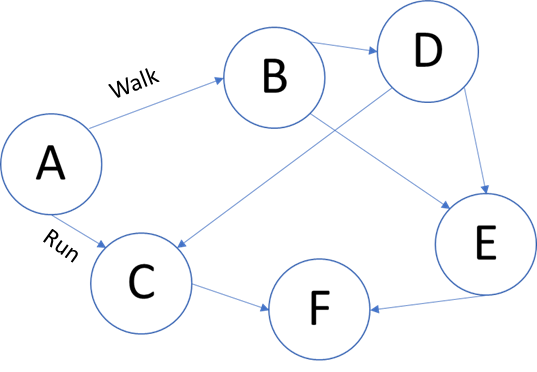

## ***3. State Tree***

---

**State tree** is another form of state space, it represents 'sequences of actions' for assisting the search.

Nodes and links are also represented 'states' and 'activities' as same as the graph but the activities and nodes are flown down (no reverse direction), not as same as the state graph.



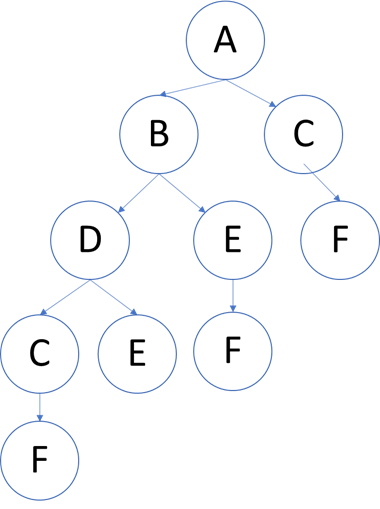

## ***4. Problem Formulation in Python***

---

Before executing any search, the state space of the problem should be in the form of a 'data collection' in the code. In Python, it can be 'list', 'tuple', 'set', and 'dictionary'.

This example as shown in the picture below, the state space is converted into the dictionary '`graph`' in Python.

**Dictionary** is a data type of Python. Dictionary is used for storing collection of ***unique*** data (no duplicate), in ***ordered*** and ***changable***.

A dictionary item has a **key** and a corresponding **value** that is expressed as a pair **(key: value)**. From the tree, Node 'A' links to Node 'B' and Node 'C', so it is converted to the code as (`'A' : ['B','C']`).

More methods to use with the dictionary >> https://www.programiz.com/python-programming/dictionary


---
# ***Assignment 1*** [10 points]:
1. From the picture below, study how the 'graph' dictionary is converted from the tree.
2. Then, execute the given code below.
3. Convert the Romania map to your own 'romania_map' dictionary.
One-way link to each city (from left to right). No cost consideration.

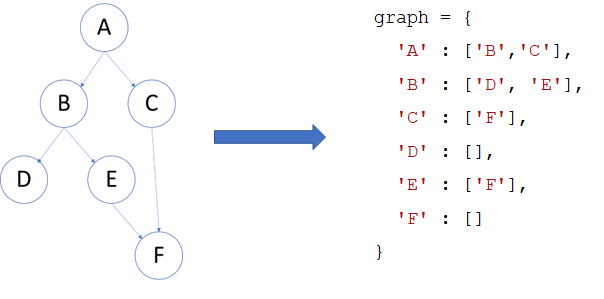

In [2]:
# 1.Study how the 'graph' dictionary is converted from the tree.
# 2.Try executing the code of 'graph' below

graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

print(graph)


{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}


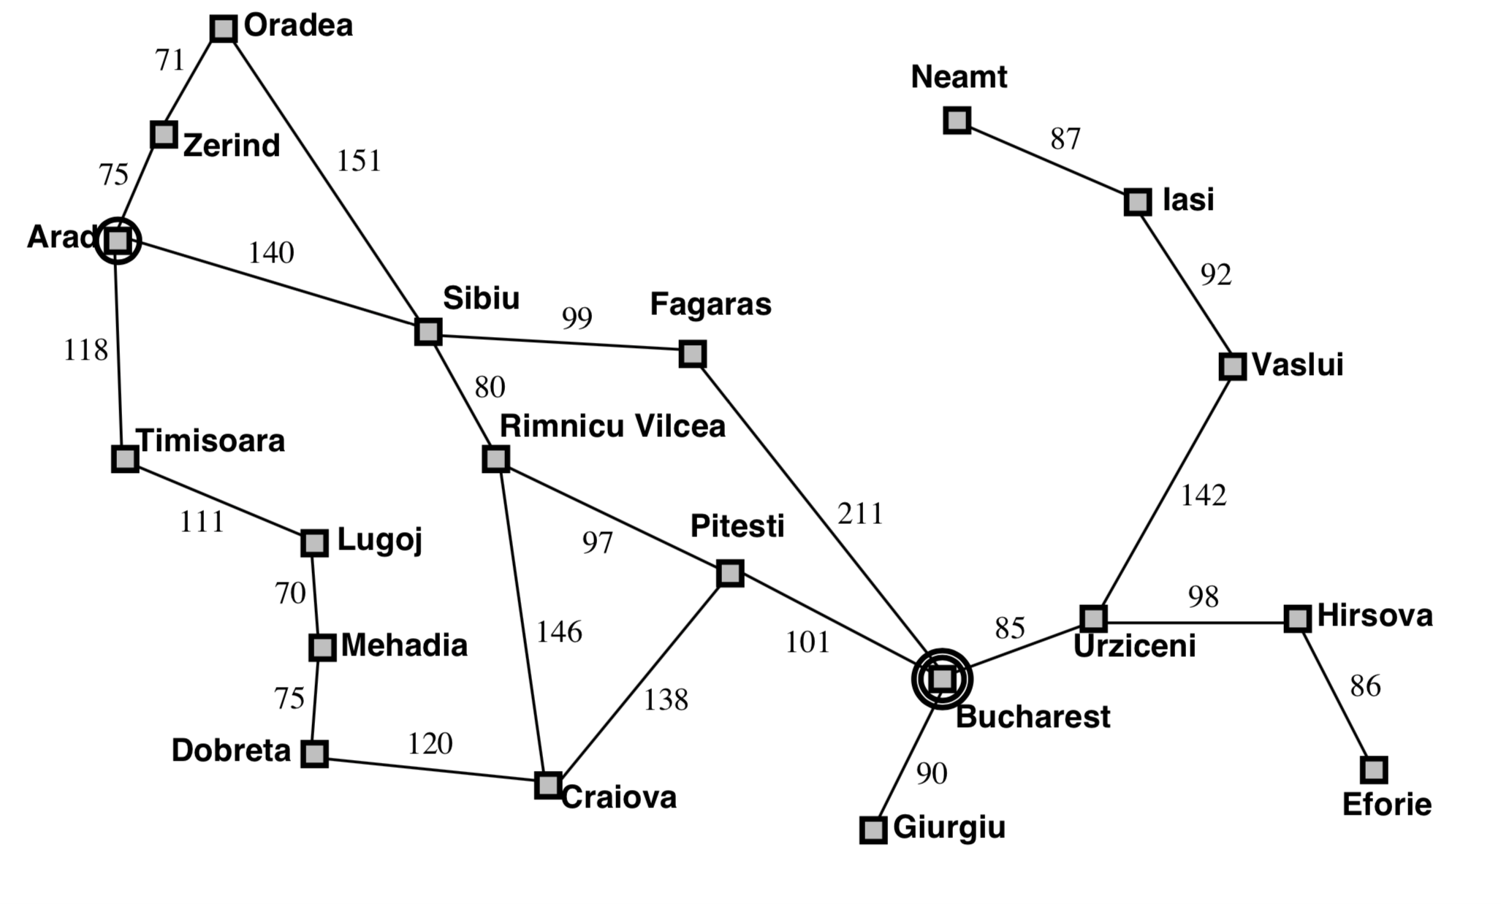

In [1]:
# 3.Convert the Romania map to your own 'romania_map' dictionary. (one-way left to right) (use the city name as the node state) here:

romania_map = {
    'Arad'          : ['Zerind' , 'Sibiu', 'Timisoara'],
    'Zerind'        : ['Arad'   , 'Oradea'],
    'Oradea'        : ['Zerind' , 'Sibiu'],
    'Sibiu'         : ['Arad'   , 'Oradea', 'Fagaras', 'Rimnicu Vilcea'],
    'Fagaras'       : ['Sibiu'  , 'Bucharest'],
    'Rimnicu Vilcea': ['Sibiu'  , 'Pitesti', 'Craiova'],
    'Pitesti'       : ['Rimnicu Vilcea', 'Bucharest', 'Craiova'],
    'Timisoara'     : ['Arad'   , 'Lugoj'],
    'Lugoj'         : ['Timisoara','Mehadia'],
    'Mehadia'       : ['Lugoj'  , 'Dobreta'],
    'Dobreta'       : ['Mehadia', 'Craiova'],
    'Craiova'       : ['Dobreta', 'Rimnicu Vilcea', 'Pitesti'],
    'Bucharest'     : ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'],
    'Giurgiu'       : ['Bucharest'],
    'Urziceni'      : ['Bucharest', 'Hirsova', 'Vaslui'],
    'Hirsova'       : ['Urziceni', 'Eforie'],
    'Eforie'        : ['Hirsova'],
    'Vaslui'        : ['Urziceni', 'Iasi'],
    'Iasi'          : ['Vaslui'  , 'Neamt'],
    'Neamt'         : ['Iasi']
}

print(romania_map)


{'Arad': ['Zerind', 'Sibiu', 'Timisoara'], 'Zerind': ['Arad', 'Oradea'], 'Oradea': ['Zerind', 'Sibiu'], 'Sibiu': ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], 'Fagaras': ['Sibiu', 'Bucharest'], 'Rimnicu Vilcea': ['Sibiu', 'Pitesti', 'Craiova'], 'Pitesti': ['Rimnicu Vilcea', 'Bucharest', 'Craiova'], 'Timisoara': ['Arad', 'Lugoj'], 'Lugoj': ['Timisoara', 'Mehadia'], 'Mehadia': ['Lugoj', 'Dobreta'], 'Dobreta': ['Mehadia', 'Craiova'], 'Craiova': ['Dobreta', 'Rimnicu Vilcea', 'Pitesti'], 'Bucharest': ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'], 'Giurgiu': ['Bucharest'], 'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'], 'Hirsova': ['Urziceni', 'Eforie'], 'Eforie': ['Hirsova'], 'Vaslui': ['Urziceni', 'Iasi'], 'Iasi': ['Vaslui', 'Neamt'], 'Neamt': ['Iasi']}
{'Arad': ['Zerind', 'Sibiu', 'Timisoara'], 'Zerind': ['Arad', 'Oradea'], 'Oradea': ['Zerind', 'Sibiu'], 'Sibiu': ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], 'Fagaras': ['Sibiu', 'Bucharest'], 'Rimnicu Vilcea': ['Sibiu', 'Pitesti', '

# Section2 - BFS

View this picture with reading the description below.
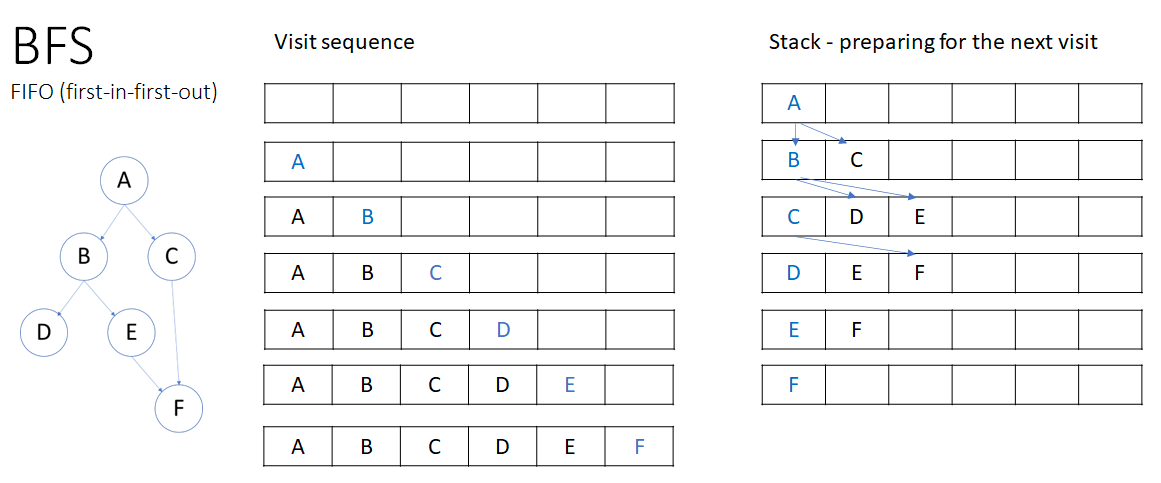

# Breadth-First-Search

---

**Method of `bfs(Graph, initial_node)`** is given in the code below.

*   The `Graph` is searched starting from the `initial_node`.
*   `stack` list is used to store the queue preparing for the next round of search
*   `visit` list is prepared to store the result of the search
*   In each round of searching, the BFS algorithm checks state of nodes in the `stack`
    * by popping the node by FIFO (the node that is first appended to the stack, will be the first node removed from the stack)
    * The first loop, there is only the `initial_node`.
    * The popped node will be considered:
        * If the considering node is not yet visited, it will be appended into the `visit` (representing that algorithm has checked the node already)
    * And the the considering node is then extend its children nodes by the Graph[] dictionary. The children nodes are extended to `stack` queuing for algorithm check.
* Until finish, the method return the result of the BFS search travelling sequences.


**BFS is the search using FIFO** - the node that is first appended to the stack, will be the first node removed from the stack. (the first node in the stack list)


---

# Assignment 2 [10 points]:
1. Read above how the method of BFS algorithm works with the dictionary 'Graph' and the lists of 'visit' and 'stack' .
2. Execute the given code below.

   2.1.   Print the list of 'stack'
   
   2.2.   Change the 'initial_node' to be 'B'.

3. Call the method bfs(romania_map, xxx ) with your own 'initial_node'.
4. Write the 'visit' sequence and 'stack' in each searching loop of romania_map. (as same as shown in the example above)


In [4]:
#1. Study how the BFS algorithm is working with 'visit' and 'stack' list.
#2. Execute the given code.
# 2.1
def bfs(Graph, initial_node):
    stack = [initial_node]
    visit = []
    while stack:
        node = stack.pop(0)
        if node not in visit:
            visit.append(node)
            #print(visit)
            stack.extend(Graph[node])
            #print(stack)
    return visit


In [5]:
# The example of calling using the 'initial state' as 'A'

bfs(graph, 'A')

['A', 'B', 'C', 'D', 'E', 'F']

In [6]:
# Change the 'initial state' to be 'B'

# put your code here
# 2.2
bfs(graph, 'B')



['B', 'D', 'E', 'F']

In [7]:
# 3.Write the code for calling the method bfs(romania_map, xxx ) with your own 'start state' here:

bfs(romania_map, 'Arad')

['Arad',
 'Zerind',
 'Sibiu',
 'Timisoara',
 'Oradea',
 'Fagaras',
 'Rimnicu Vilcea',
 'Lugoj',
 'Bucharest',
 'Pitesti',
 'Craiova',
 'Mehadia',
 'Giurgiu',
 'Urziceni',
 'Dobreta',
 'Hirsova',
 'Vaslui',
 'Eforie',
 'Iasi',
 'Neamt']

4. Write the answer of the 'visit' sequence and 'stack' in each BFS searching loop in romania_map. (as same as shown in the example above) here:

**Visit**
*   Loop 1: Arad
*   Loop 2: Arad Zerind
*   Loop 3: Arad Zerind Sibiu
*   Loop 4: Arad Zerind Sibiu Timisoara
*   Loop 5: Arad Zerind Sibiu Timisoara Oradea
*   Loop 6: Arad Zerind Sibiu Timisoara Oradea Fagaras


**Stack**
*   Loop 1: Arad
*   Loop 2: Zerind Sibiu Timisoara
*   Loop 3: Sibiu Timisoara Oradea
*   Loop 4: Timisoara Oradea Fagaras 'Rimnicu Vilcea'
*   Loop 5: Oradea Fagaras 'Rimnicu Vilcea' Lugoj
*   Loop 6: Fagaras 'Rimnicu Vilcea' Lugoj


# Section3 - DFS

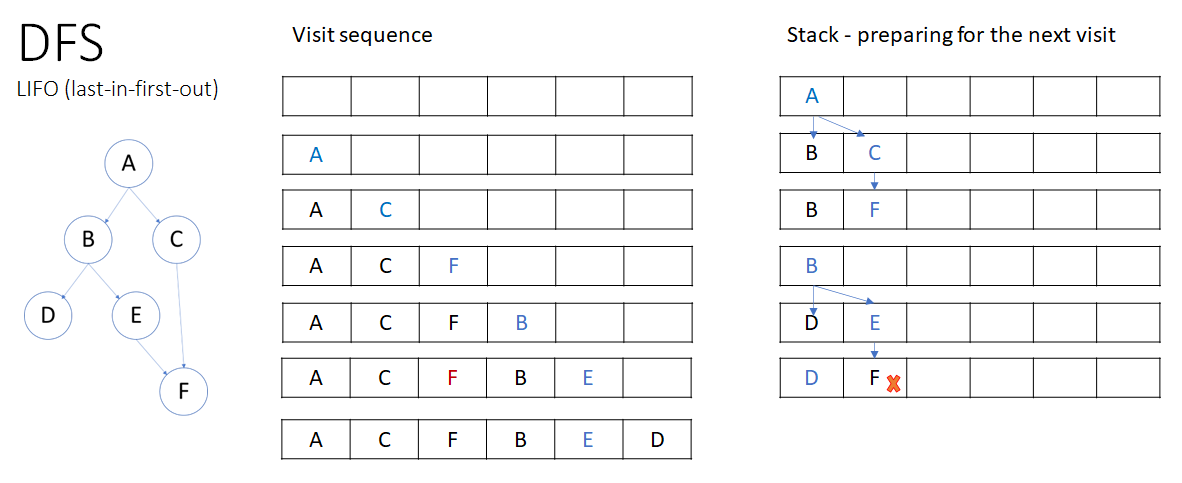

# Depth-First-Search

---

**Method of `dfs(Graph, initial_node)`** is given in the code below.

*   The `Graph` is searched starting from the `initial_node`.
*   `stack` list is used to store the queue preparing for the next round of search
*   `visit` list is prepared to store the result of the search

**DFS is the search using LIFO** - the node that is last appended to the stack, will be the first node removed from the stack. (the last node in the stack list)


---

# Assignment 3 [10 points]:
1. View the given code belowa and study how the DFS algorithm is working with 'visit' and 'stack' list.
2. Execute the given code below.

   2.1.   Print the list of 'stack'
   
   2.2.   Change the 'initial_node' to be 'B'.

3. Call the method bfs(romania_map, xxx ) with your own 'initial_node'.
4. Write the 'visit' sequence and 'stack' in each searching loop of romania_map. (as same as shown in the example above)


In [8]:
# Study how the DFS algorithm is working with 'visit' and 'stack' list.
# Try executing the given code.
def dfs(Graph, initial_node):
    visit = []
    stack = [initial_node]
    while stack:
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            #print(visit)
            stack.extend(Graph[node])
            #print(stack)
    return visit

Which line of code of BFS and DFS are different?

Answer:





In [9]:
# The example of calling using the 'start state' as 'A'
# Try changing the 'start state' to be the other nodes.
dfs(graph, 'A')

['A', 'C', 'F', 'B', 'E', 'D']

In [10]:
# 3. Write the code for calling the method dfs(romania_map, xxx ) with your own 'start state' here:

dfs(romania_map,'Arad')




['Arad',
 'Timisoara',
 'Lugoj',
 'Mehadia',
 'Dobreta',
 'Craiova',
 'Pitesti',
 'Bucharest',
 'Urziceni',
 'Vaslui',
 'Iasi',
 'Neamt',
 'Hirsova',
 'Eforie',
 'Giurgiu',
 'Fagaras',
 'Sibiu',
 'Rimnicu Vilcea',
 'Oradea',
 'Zerind']

4. Write the answer of the 'visit' sequence and 'stack' in each DFS searching loopin romania_map. (as same as shown in the example above) here:

**Visit**
*   Loop 1: Arad
*   Loop 2: Arad Timisoara
*   Loop 3: Arad Timisoara Lugoj
*   Loop 4: Arad Timisoara Lugoj Mehadia
*   Loop 5: Arad Timisoara Lugoj Mehadia Dobreta
*   Loop 6: Arad Timisoara Lugoj Mehadia Dobreta Craiova



**Stack**
*   Loop 1: Arad 
*   Loop 2: Zerind, Sibiu, Timisoara
*   Loop 3: Zerind, Sibiu, Lugoj
*   Loop 4: Zerind, Sibiu, Mehadia
*   Loop 5: Zerind, Sibiu, Dobreta
*   Loop 6: Zerind, Sibiu, Craiova



---

# Assignment 4 [4 points]:
1. Answer 'What is the difference in the code of BFS and DFS?'\n

**ANSWER HERE**: 

`bfs: pop from the first entry in the stack`

`dfs: pop the last entry`




2. Answer 'How the result of BFS and DFS are different?'

**ANSWER HERE**: 

`bfs: Visits all neighboring first before next level`

`dfs: Visits as deep as possible along a branch before backtracking`






---





# Section4 - Iterative Deepening Search (IDS)

The method of `ids(Graph, initial_node, limit)` is given. The method returns the result of the search travelling path using IDS algorithm. The algorithm starts the search from the 'initial_node' with the 'limit' level for BFS searching.

Two lists are used:

*   `visit`: to store the result of the search
*   `nextlevel`: to store the queue in the next node level preparing for the next round of search if the search does not exceed the limit

**IDS is the search based on the BFS with the limit level** - the node that is last appended to the stack, will be the first node removed from the stack. (the last node in the stack list)


---

# Assignment 5 [10 points]:
1. View the given code and study how the IDS algorithm is working with 'visit', 'nextlevel' and 'thislevel' list.
2. Execute the given code

  2.1 Change the number of limit.

3. Call the method ids(romania_map, xxx , limit) with your own 'initial_node' and 'limit'.
4. Write the 'visit' sequence and 'nextlevel' in each searching loop.



In [15]:
# Study how the IDS algorithm is working with 'visit', 'nextlevel' and 'thislevel' list.
# Try executing the given code by changing the number of limit.

def ids(G, start, limit):
    visit = []
    nextlevel = [start]
    for i in range(limit+1):
        thislevel = nextlevel
        nextlevel = []
        while thislevel:
          v = thislevel.pop(0)
          if v not in visit:
            visit.append(v)
            print(visit)
            nextlevel.extend(G[v])
            print(nextlevel)
    return visit


In [24]:
# The example of calling using the 'start state' as 'A'
# Try changing the 'start state' to be the other nodes. And changing the 'limit' to be 0 and 1

ids(graph, 'A',2)



['A']
['B', 'C']
['A', 'B']
['D', 'E']
['A', 'B', 'C']
['D', 'E', 'F']
['A', 'B', 'C', 'D']
[]
['A', 'B', 'C', 'D', 'E']
['F']
['A', 'B', 'C', 'D', 'E', 'F']
['F']


['A', 'B', 'C', 'D', 'E', 'F']

In [20]:
# 3. Write the code for calling the method dfs(romania_map, xxx ) with your own 'start state' here:
print('limit 0')
print(ids(romania_map,'Arad', 0))
print('limit 1')
print(ids(romania_map,'Arad', 1))






limit 0
['Arad']
['Zerind', 'Sibiu', 'Timisoara']
['Arad']
limit 1
['Arad']
['Zerind', 'Sibiu', 'Timisoara']
['Arad', 'Zerind']
['Arad', 'Oradea']
['Arad', 'Zerind', 'Sibiu']
['Arad', 'Oradea', 'Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea']
['Arad', 'Zerind', 'Sibiu', 'Timisoara']
['Arad', 'Oradea', 'Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea', 'Arad', 'Lugoj']
['Arad', 'Zerind', 'Sibiu', 'Timisoara']


Write the answer of the 'visit' sequence and 'nextlevel' in each IDS searching loop. (as same as shown in the example above) here:

**Visit**
*   Loop 1: Arad
*   Loop 2: Arad, Zerind, Sibiu, Timisoara
*   Loop 3: Arad, Zerind, Sibiu, Timisoara, Oradea, Fagaras, Rimnicu Vilcea, Lugoj
*   Loop 4: Arad, Zerind, Sibiu, Timisoara, Oradea, Fagaras, Rimnicu Vilcea, Lugoj, Bucharest, Pitesti, Craiova, Mehadia
*   Loop 5: Arad, Zerind, Sibiu, Timisoara, Oradea, Fagaras, Rimnicu Vilcea, Lugoj, Bucharest, Pitesti, Craiova, Mehadia, Giurgiu, Urziceni
*   Loop 6: Arad, Zerind, Sibiu, Timisoara, Oradea, Fagaras, Rimnicu Vilcea, Lugoj, Bucharest, Pitesti, Craiova, Mehadia, Giurgiu, Urziceni, Dobreta, Hirsova, Vaslui, Eforie


**nextlevel**
*   Loop 1: Zerind, Sibiu, Timisoara
*   Loop 2: Oradea, Arad, Oradea, Arad, Oradea, Fagaras, Rimnicu Vilcea, Lugoj
*   Loop 3: Arad, Oradea, Fagaras, Rimnicu Vilcea, Timisoara, Lugoj, Sibiu, Bucharest, Pitesti, Craiova
*   Loop 4: Oradea, Fagaras, Rimnicu Vilcea, Timisoara, Lugoj, Sibiu, Bucharest, Pitesti, Craiova, Mehadia, Dobreta
*   Loop 5: Rimnicu Vilcea, Timisoara, Lugoj, Sibiu, Bucharest, Pitesti, Craiova, Mehadia, Dobreta, Giurgiu, Urziceni
*   Loop 6: Timisoara, Lugoj, Sibiu, Bucharest, Pitesti, Craiova, Mehadia, Dobreta, Giurgiu, Urziceni, Hirsova, Vaslui, Iasi



---

# Assignment 6 [4 points]:
1. What is the 'number of limit' to cover the IDS search of all nodes in the romania_map?

**ANSWER HERE**: 

`The limit required is 4.`



2. Answer 'how the result of BFS, DFS and IDS are different?'

**ANSWER HERE**: 

`BFS: Explores nodes level by level. Finds the shortest path in an unweighted graph. Uses more memory.`

`DFS: Explores as far as possible along each branch before backtracking. Uses less memory but can get trapped in cycles.`

`IDS: Combines BFS and DFS benefits. Uses DFS with increasing depth limits. Finds shortest path with less memory usage.`





---